# Real Estate Analysis

In [93]:
import numpy as np                                                     # Numerical operations
import pandas as pd                                                    # Working with datasets
from scipy.stats import variation                                      # Coefficient of variation
import seaborn as sns                                                  # Data Visualizations
import matplotlib.pyplot as plt                                        # Data Visualizations
from sklearn.preprocessing import MinMaxScaler,StandardScaler          # For normalizing,standardizing the data
from sklearn.model_selection import train_test_split,cross_val_score   # for splitting thedata into train and test 
from sklearn.metrics import mean_squared_error as MSE,mean_absolute_percentage_error as MAPE # mean abs percentage error 
from sklearn.linear_model import LinearRegression                      # importing Linear Regression
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor

In [16]:
# Loading the dataset
data=pd.read_excel("Terros_Real_Estate_Analysis.xlsx")

Basic Data Exploration

In [17]:
# getting top 5 rows
data.head()

,CRIME_RATE,AGE,INDUS,NOX,DISTANCE,TAX,PTRATIO,AVG_ROOM,LSTAT,AVG_PRICE
0,6.32,65.2,2.31,0.538,1,296,15.3,6.575,4.98,24.0
1,4.31,78.9,7.07,0.469,2,242,17.8,6.421,9.14,21.6
2,7.87,61.1,7.07,0.469,2,242,17.8,7.185,4.03,34.7
3,6.47,45.8,2.18,0.458,3,222,18.7,6.998,2.94,33.4
4,5.24,54.2,2.18,0.458,3,222,18.7,7.147,5.33,36.2


In [18]:
# Getting bottom 5 rows
data.tail()

,CRIME_RATE,AGE,INDUS,NOX,DISTANCE,TAX,PTRATIO,AVG_ROOM,LSTAT,AVG_PRICE
501,4.48,69.1,11.93,0.573,1,273,21.0,6.593,9.67,22.4
502,0.46,76.7,11.93,0.573,1,273,21.0,6.120,9.08,20.6
503,9.42,91.0,11.93,0.573,1,273,21.0,6.976,5.64,23.9
504,6.94,89.3,11.93,0.573,1,273,21.0,6.794,6.48,22.0
505,9.54,80.8,11.93,0.573,1,273,21.0,6.030,7.88,11.9


In [19]:
# Dimension of dataset
data.shape

(506, 10)

In [20]:
data.size

5060

In [21]:
data.columns

Index(['CRIME_RATE', 'AGE', 'INDUS', 'NOX', 'DISTANCE', 'TAX', 'PTRATIO',
       'AVG_ROOM', 'LSTAT', 'AVG_PRICE'],
      dtype='object')

In [22]:
# Getting data types,all the variables are numerical
data.dtypes

CRIME_RATE    float64
AGE           float64
INDUS         float64
NOX           float64
DISTANCE        int64
TAX             int64
PTRATIO       float64
AVG_ROOM      float64
LSTAT         float64
AVG_PRICE     float64
dtype: object

In [23]:
# Checking for duplicated values
data.duplicated().sum()

0

In [24]:
# Checking for null values
data.isnull().sum()

CRIME_RATE    0
AGE           0
INDUS         0
NOX           0
DISTANCE      0
TAX           0
PTRATIO       0
AVG_ROOM      0
LSTAT         0
AVG_PRICE     0
dtype: int64

In [25]:
# No null values and no duplicates are present

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIME_RATE  506 non-null    float64
 1   AGE         506 non-null    float64
 2   INDUS       506 non-null    float64
 3   NOX         506 non-null    float64
 4   DISTANCE    506 non-null    int64  
 5   TAX         506 non-null    int64  
 6   PTRATIO     506 non-null    float64
 7   AVG_ROOM    506 non-null    float64
 8   LSTAT       506 non-null    float64
 9   AVG_PRICE   506 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 39.7 KB


In [27]:
data.dtypes

CRIME_RATE    float64
AGE           float64
INDUS         float64
NOX           float64
DISTANCE        int64
TAX             int64
PTRATIO       float64
AVG_ROOM      float64
LSTAT         float64
AVG_PRICE     float64
dtype: object

In [28]:
# Statistical description of data
data.describe()

,CRIME_RATE,AGE,INDUS,NOX,DISTANCE,TAX,PTRATIO,AVG_ROOM,LSTAT,AVG_PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,4.871976,68.574901,11.136779,0.554695,9.549407,408.237154,18.455534,6.284634,12.653063,22.532806
std,2.921132,28.148861,6.860353,0.115878,8.707259,168.537116,2.164946,0.702617,7.141062,9.197104
min,0.040000,2.900000,0.460000,0.385000,1.000000,187.000000,12.600000,3.561000,1.730000,5.000000
25%,2.412500,45.025000,5.190000,0.449000,4.000000,279.000000,17.400000,5.885500,6.950000,17.025000
50%,4.820000,77.500000,9.690000,0.538000,5.000000,330.000000,19.050000,6.208500,11.360000,21.200000
75%,7.325000,94.075000,18.100000,0.624000,24.000000,666.000000,20.200000,6.623500,16.955000,25.000000
max,9.990000,100.000000,27.740000,0.871000,24.000000,711.000000,22.000000,8.780000,37.970000,50.000000


In [29]:
for i in data.columns:
    if data[i].dtype==float:
        mean_df = data[i].mean()
        median_df = data[i].median()
        mode_df = data[i].mode().values[0]
        print()
        print("-------",i,"-------")
        print()
        print("Mean of",i,"  :", mean_df)
        print("Median of",i,":", median_df)
        print("Mode of",i,"  :", mode_df)


------- CRIME_RATE -------

Mean of CRIME_RATE   : 4.871976284584978
Median of CRIME_RATE : 4.82
Mode of CRIME_RATE   : 3.43

------- AGE -------

Mean of AGE   : 68.57490118577078
Median of AGE : 77.5
Mode of AGE   : 100.0

------- INDUS -------

Mean of INDUS   : 11.136778656126504
Median of INDUS : 9.69
Mode of INDUS   : 18.1

------- NOX -------

Mean of NOX   : 0.5546950592885372
Median of NOX : 0.538
Mode of NOX   : 0.538

------- PTRATIO -------

Mean of PTRATIO   : 18.455533596837967
Median of PTRATIO : 19.05
Mode of PTRATIO   : 20.2

------- AVG_ROOM -------

Mean of AVG_ROOM   : 6.284634387351787
Median of AVG_ROOM : 6.2085
Mode of AVG_ROOM   : 5.713

------- LSTAT -------

Mean of LSTAT   : 12.653063241106723
Median of LSTAT : 11.36
Mode of LSTAT   : 6.36

------- AVG_PRICE -------

Mean of AVG_PRICE   : 22.532806324110698
Median of AVG_PRICE : 21.2
Mode of AVG_PRICE   : 50.0


In [30]:
df_num = data.select_dtypes(include='number')

In [31]:
Range = df_num.max()-df_num.min()
Variance = df_num.var()
Standard_Deviation = df_num.std()
print('\n',"-----Range of Numerical Columns-----",'\n')
print(Range)
print('\n',"-----Variance of Numerical Columns-----",'\n')
print(Variance)
print('\n',"-----Standard Deviation of Numerical Columns-----",'\n')
print(Standard_Deviation)


 -----Range of Numerical Columns----- 

CRIME_RATE      9.950
AGE            97.100
INDUS          27.280
NOX             0.486
DISTANCE       23.000
TAX           524.000
PTRATIO         9.400
AVG_ROOM        5.219
LSTAT          36.240
AVG_PRICE      45.000
dtype: float64

 -----Variance of Numerical Columns----- 

CRIME_RATE        8.533012
AGE             792.358399
INDUS            47.064442
NOX               0.013428
DISTANCE         75.816366
TAX           28404.759488
PTRATIO           4.686989
AVG_ROOM          0.493671
LSTAT            50.994760
AVG_PRICE        84.586724
dtype: float64

 -----Standard Deviation of Numerical Columns----- 

CRIME_RATE      2.921132
AGE            28.148861
INDUS           6.860353
NOX             0.115878
DISTANCE        8.707259
TAX           168.537116
PTRATIO         2.164946
AVG_ROOM        0.702617
LSTAT           7.141062
AVG_PRICE       9.197104
dtype: float64


In [32]:
Skewness = df_num.skew()
Kurtosis = df_num.kurt()
print('\n',"-----Skewness of Numerical Columns-----",'\n')
print(Skewness)
print('\n',"-----Kurtosis of Numerical Columns-----",'\n')
print(Kurtosis)


 -----Skewness of Numerical Columns----- 

CRIME_RATE    0.021728
AGE          -0.598963
INDUS         0.295022
NOX           0.729308
DISTANCE      1.004815
TAX           0.669956
PTRATIO      -0.802325
AVG_ROOM      0.403612
LSTAT         0.906460
AVG_PRICE     1.108098
dtype: float64

 -----Kurtosis of Numerical Columns----- 

CRIME_RATE   -1.189122
AGE          -0.967716
INDUS        -1.233540
NOX          -0.064667
DISTANCE     -0.867232
TAX          -1.142408
PTRATIO      -0.285091
AVG_ROOM      1.891500
LSTAT         0.493240
AVG_PRICE     1.495197
dtype: float64


In [33]:
# Univariate visualization
data.columns

Index(['CRIME_RATE', 'AGE', 'INDUS', 'NOX', 'DISTANCE', 'TAX', 'PTRATIO',
       'AVG_ROOM', 'LSTAT', 'AVG_PRICE'],
      dtype='object')

[Text(0.5, 1.0, 'Box plot for CRIME_RATE')]

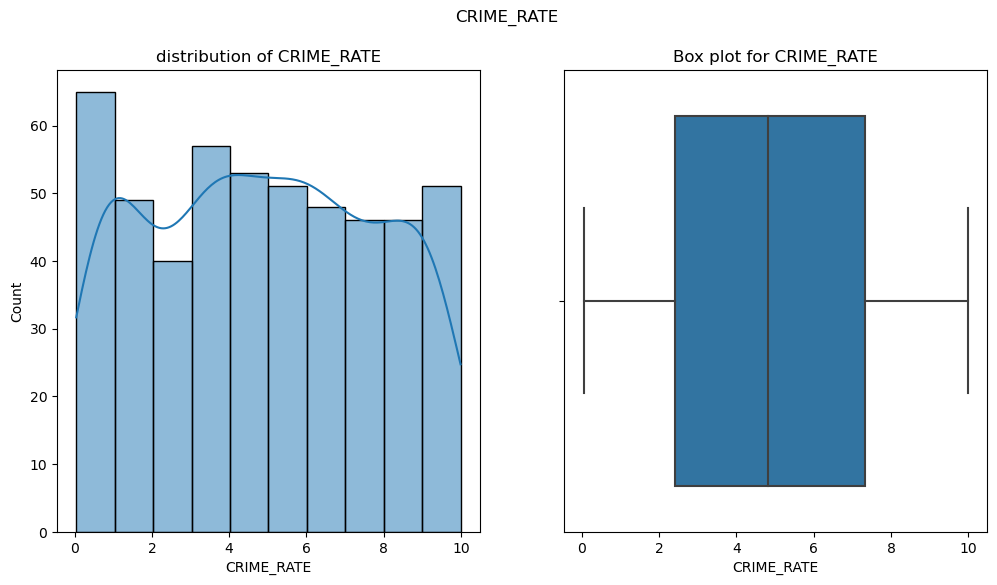

In [34]:
fig,axes=plt.subplots(1,2,figsize=(12,6))
plt.suptitle('CRIME_RATE')
sns.histplot(data=data,x='CRIME_RATE',kde=True,ax=axes[0]).set(title='distribution of CRIME_RATE')
sns.boxplot(data=data,x='CRIME_RATE').set(title='Box plot for CRIME_RATE')

In [35]:
# Crime rate variable have no outliers present

[Text(0.5, 1.0, 'Box plot for AGE')]

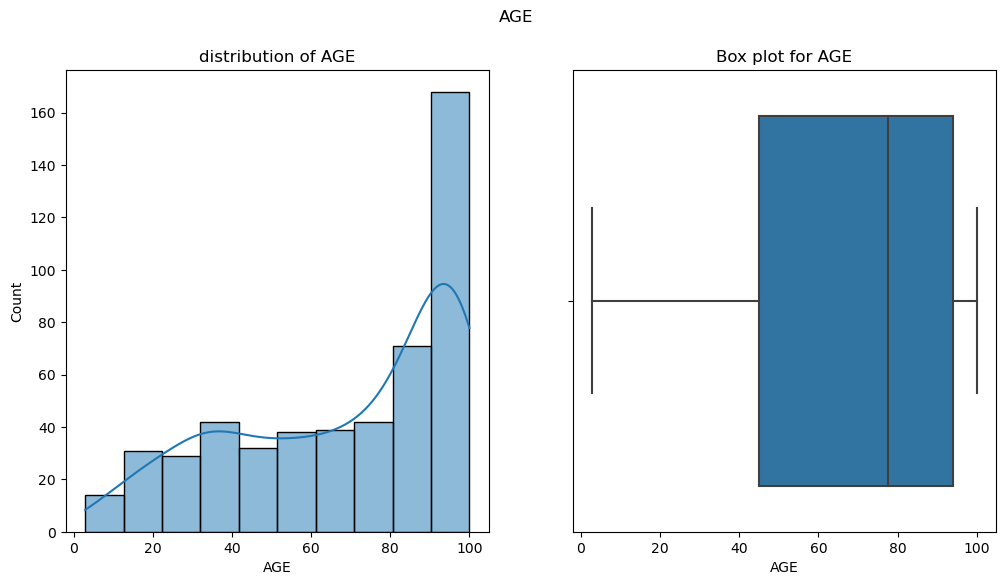

In [36]:
fig,axes=plt.subplots(1,2,figsize=(12,6))
plt.suptitle('AGE')
sns.histplot(data=data,x='AGE',kde=True,ax=axes[0]).set(title='distribution of AGE')
sns.boxplot(data=data,x='AGE').set(title='Box plot for AGE')

In [37]:
# Crime rate variable have no outliers present and the distribution is negatively skewed

[Text(0.5, 1.0, 'Box plot for INDUS')]

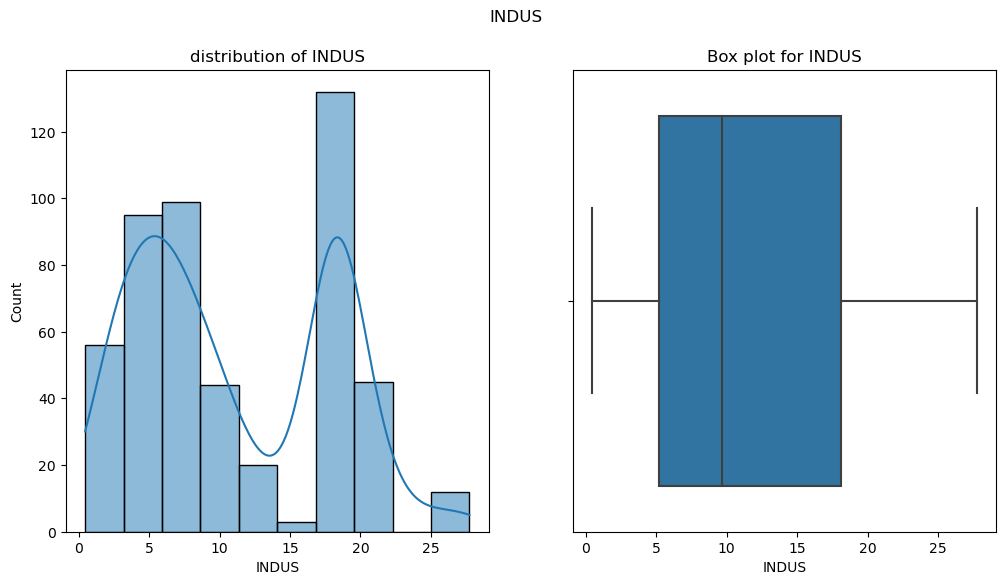

In [38]:
fig,axes=plt.subplots(1,2,figsize=(12,6))
plt.suptitle('INDUS')
sns.histplot(data=data,x='INDUS',kde=True,ax=axes[0]).set(title='distribution of INDUS')
sns.boxplot(data=data,x='INDUS').set(title='Box plot for INDUS')

In [39]:
# indus variable have no outliers 

[Text(0.5, 1.0, 'Box plot for NOX')]

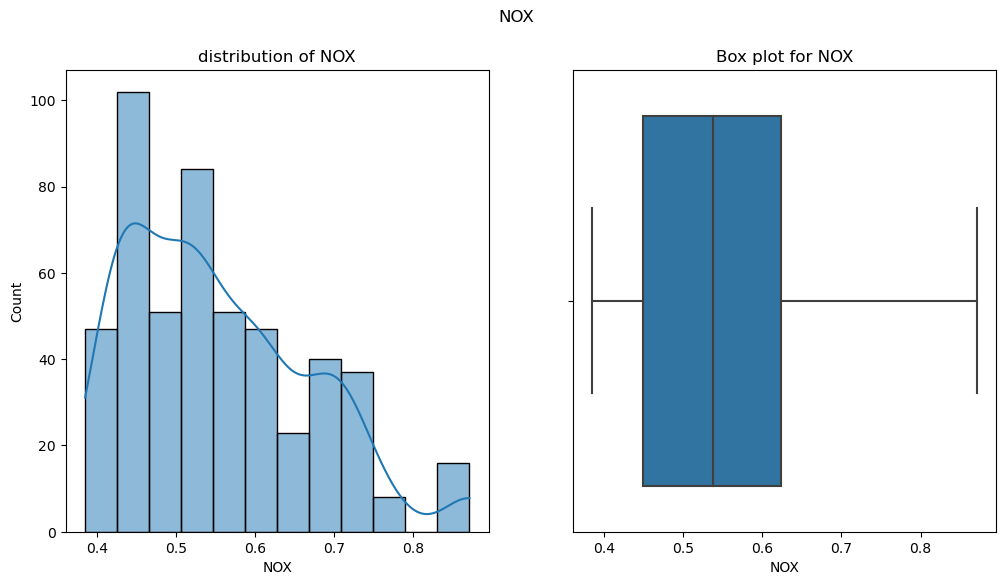

In [40]:
fig,axes=plt.subplots(1,2,figsize=(12,6))
plt.suptitle('NOX')
sns.histplot(data=data,x='NOX',kde=True,ax=axes[0]).set(title='distribution of NOX')
sns.boxplot(data=data,x='NOX').set(title='Box plot for NOX')

In [41]:
# NOX variable have no outliers present

[Text(0.5, 1.0, 'Box plot for DISTANCE')]

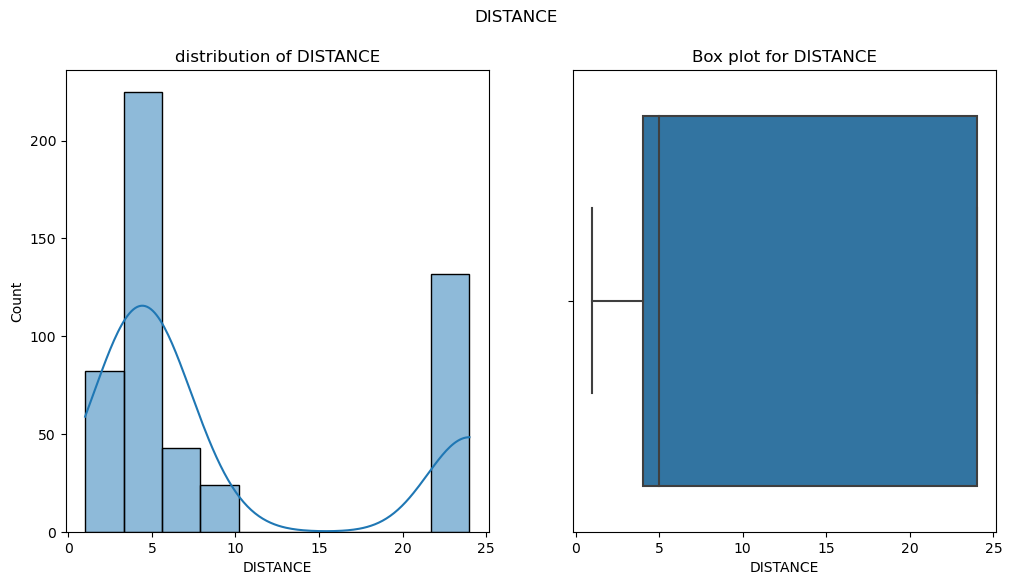

In [42]:
fig,axes=plt.subplots(1,2,figsize=(12,6))
plt.suptitle('DISTANCE')
sns.histplot(data=data,x='DISTANCE',kde=True,ax=axes[0]).set(title='distribution of DISTANCE')
sns.boxplot(data=data,x='DISTANCE').set(title='Box plot for DISTANCE')

[Text(0.5, 1.0, 'Box plot for TAX')]

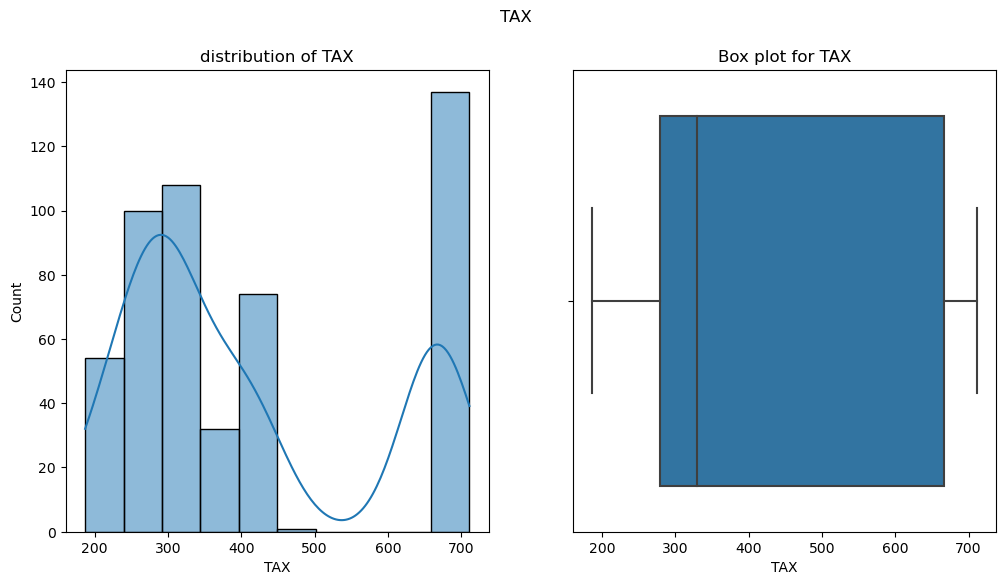

In [43]:
fig,axes=plt.subplots(1,2,figsize=(12,6))
plt.suptitle('TAX')
sns.histplot(data=data,x='TAX',kde=True,ax=axes[0]).set(title='distribution of TAX')
sns.boxplot(data=data,x='TAX').set(title='Box plot for TAX')

[Text(0.5, 1.0, 'Box plot for PTRATIO')]

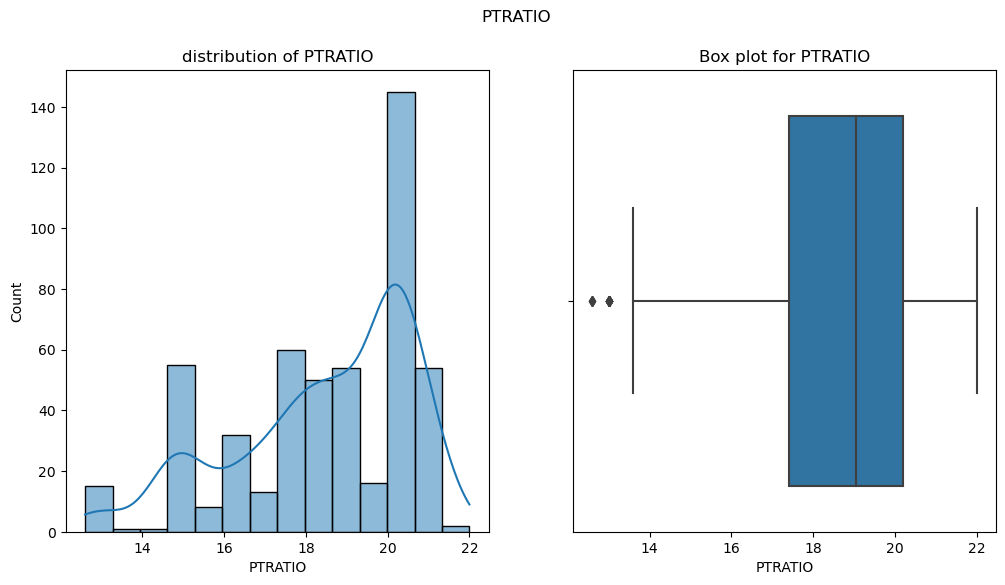

In [44]:
fig,axes=plt.subplots(1,2,figsize=(12,6))
plt.suptitle('PTRATIO')
sns.histplot(data=data,x='PTRATIO',kde=True,ax=axes[0]).set(title='distribution of PTRATIO')
sns.boxplot(data=data,x='PTRATIO').set(title='Box plot for PTRATIO')

[Text(0.5, 1.0, 'Box plot for AVG_ROOM')]

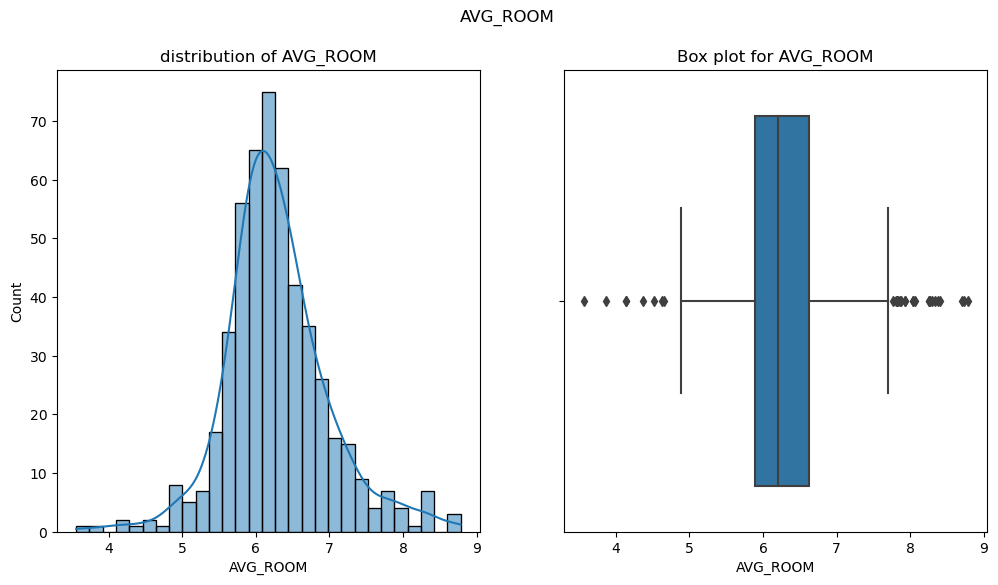

In [45]:
fig,axes=plt.subplots(1,2,figsize=(12,6))
plt.suptitle('AVG_ROOM')
sns.histplot(data=data,x='AVG_ROOM',kde=True,ax=axes[0]).set(title='distribution of AVG_ROOM')
sns.boxplot(data=data,x='AVG_ROOM').set(title='Box plot for AVG_ROOM')

[Text(0.5, 1.0, 'Box plot for LSTAT')]

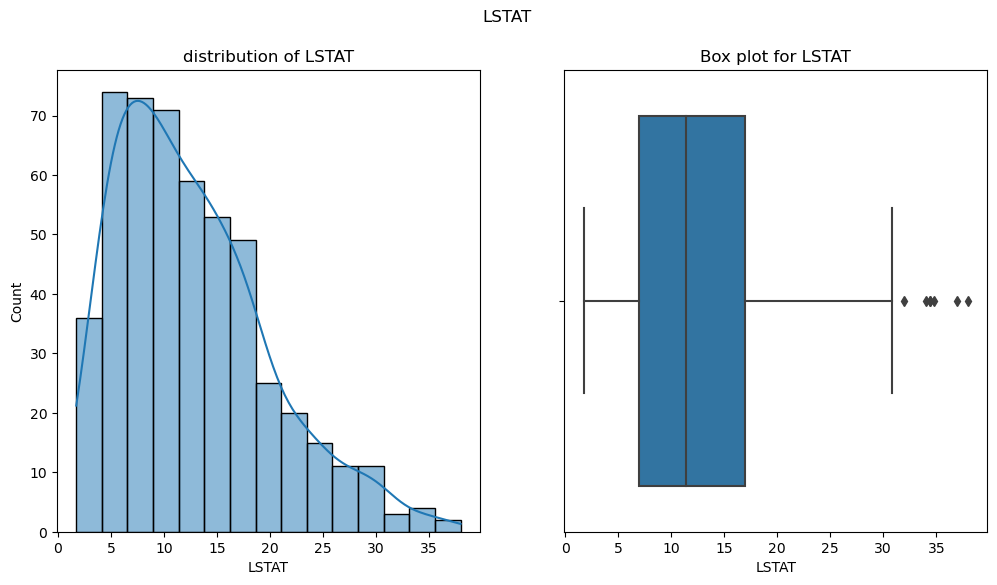

In [46]:
fig,axes=plt.subplots(1,2,figsize=(12,6))
plt.suptitle('LSTAT')
sns.histplot(data=data,x='LSTAT',kde=True,ax=axes[0]).set(title='distribution of LSTAT')
sns.boxplot(data=data,x='LSTAT').set(title='Box plot for LSTAT')

[Text(0.5, 1.0, 'Box plot for AVG_PRICE')]

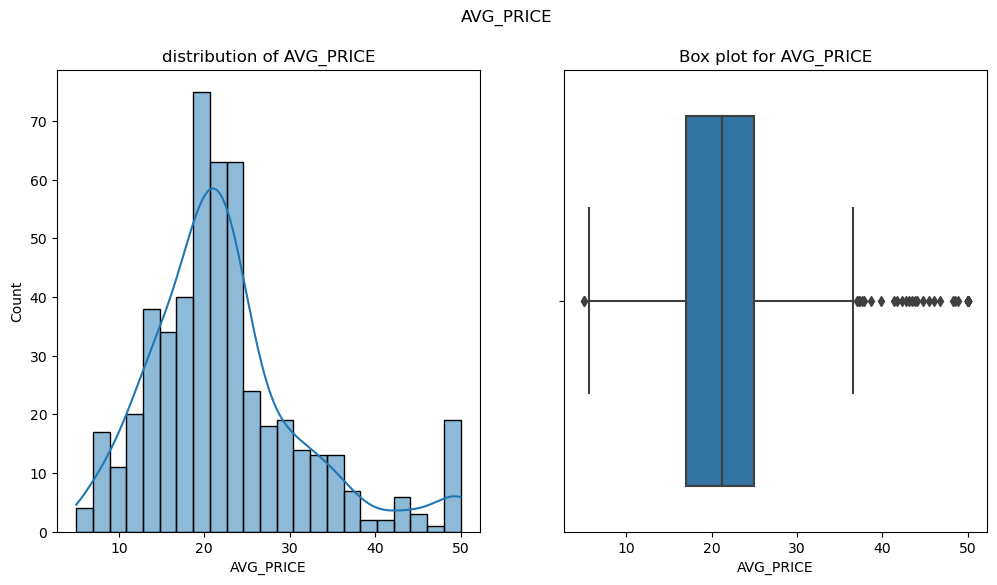

In [47]:
fig,axes=plt.subplots(1,2,figsize=(12,6))
plt.suptitle('AVG_PRICE')
sns.histplot(data=data,x='AVG_PRICE',kde=True,ax=axes[0]).set(title='distribution of AVG_PRICE')
sns.boxplot(data=data,x='AVG_PRICE').set(title='Box plot for AVG_PRICE')

In [48]:
data.corr()

,CRIME_RATE,AGE,INDUS,NOX,DISTANCE,TAX,PTRATIO,AVG_ROOM,LSTAT,AVG_PRICE
CRIME_RATE,1.000000,0.006859,-0.005511,0.001851,-0.009055,-0.016749,0.010801,0.027396,-0.042398,0.043338
AGE,0.006859,1.000000,0.644779,0.731470,0.456022,0.506456,0.261515,-0.240265,0.602339,-0.376955
INDUS,-0.005511,0.644779,1.000000,0.763651,0.595129,0.720760,0.383248,-0.391676,0.603800,-0.483725
NOX,0.001851,0.731470,0.763651,1.000000,0.611441,0.668023,0.188933,-0.302188,0.590879,-0.427321
DISTANCE,-0.009055,0.456022,0.595129,0.611441,1.000000,0.910228,0.464741,-0.209847,0.488676,-0.381626
TAX,-0.016749,0.506456,0.720760,0.668023,0.910228,1.000000,0.460853,-0.292048,0.543993,-0.468536
PTRATIO,0.010801,0.261515,0.383248,0.188933,0.464741,0.460853,1.000000,-0.355501,0.374044,-0.507787
AVG_ROOM,0.027396,-0.240265,-0.391676,-0.302188,-0.209847,-0.292048,-0.355501,1.000000,-0.613808,0.695360
LSTAT,-0.042398,0.602339,0.603800,0.590879,0.488676,0.543993,0.374044,-0.613808,1.000000,-0.737663
AVG_PRICE,0.043338,-0.376955,-0.483725,-0.427321,-0.381626,-0.468536,-0.507787,0.695360,-0.737663,1.000000


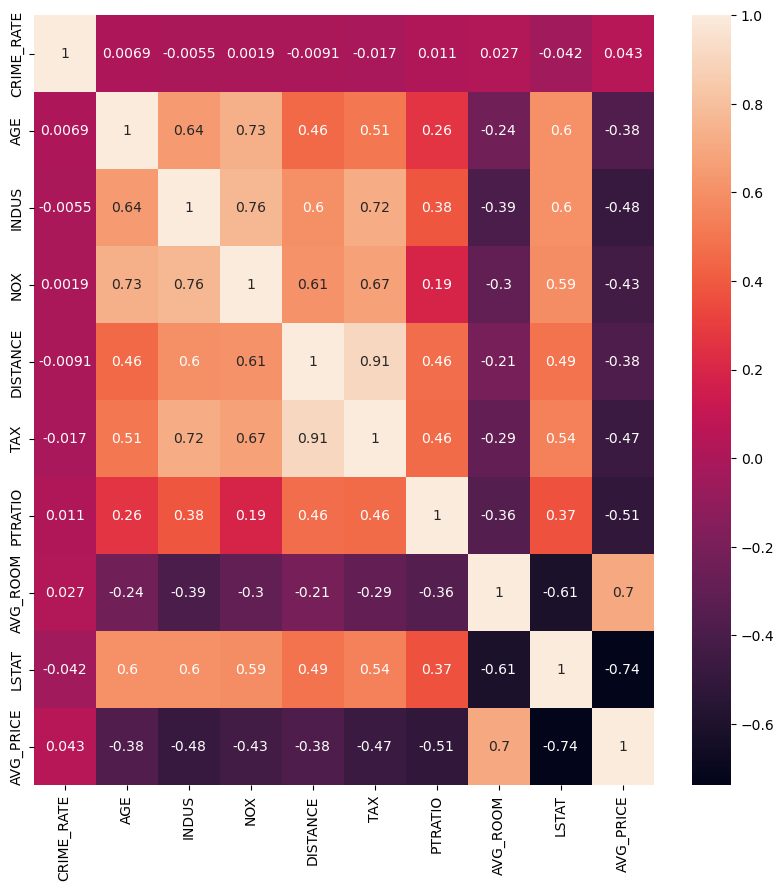

In [49]:
# Correlation plot
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [50]:
# From heatmap we can infer that lstat,avg_room,ptration have some linear dependency with avg_price variable

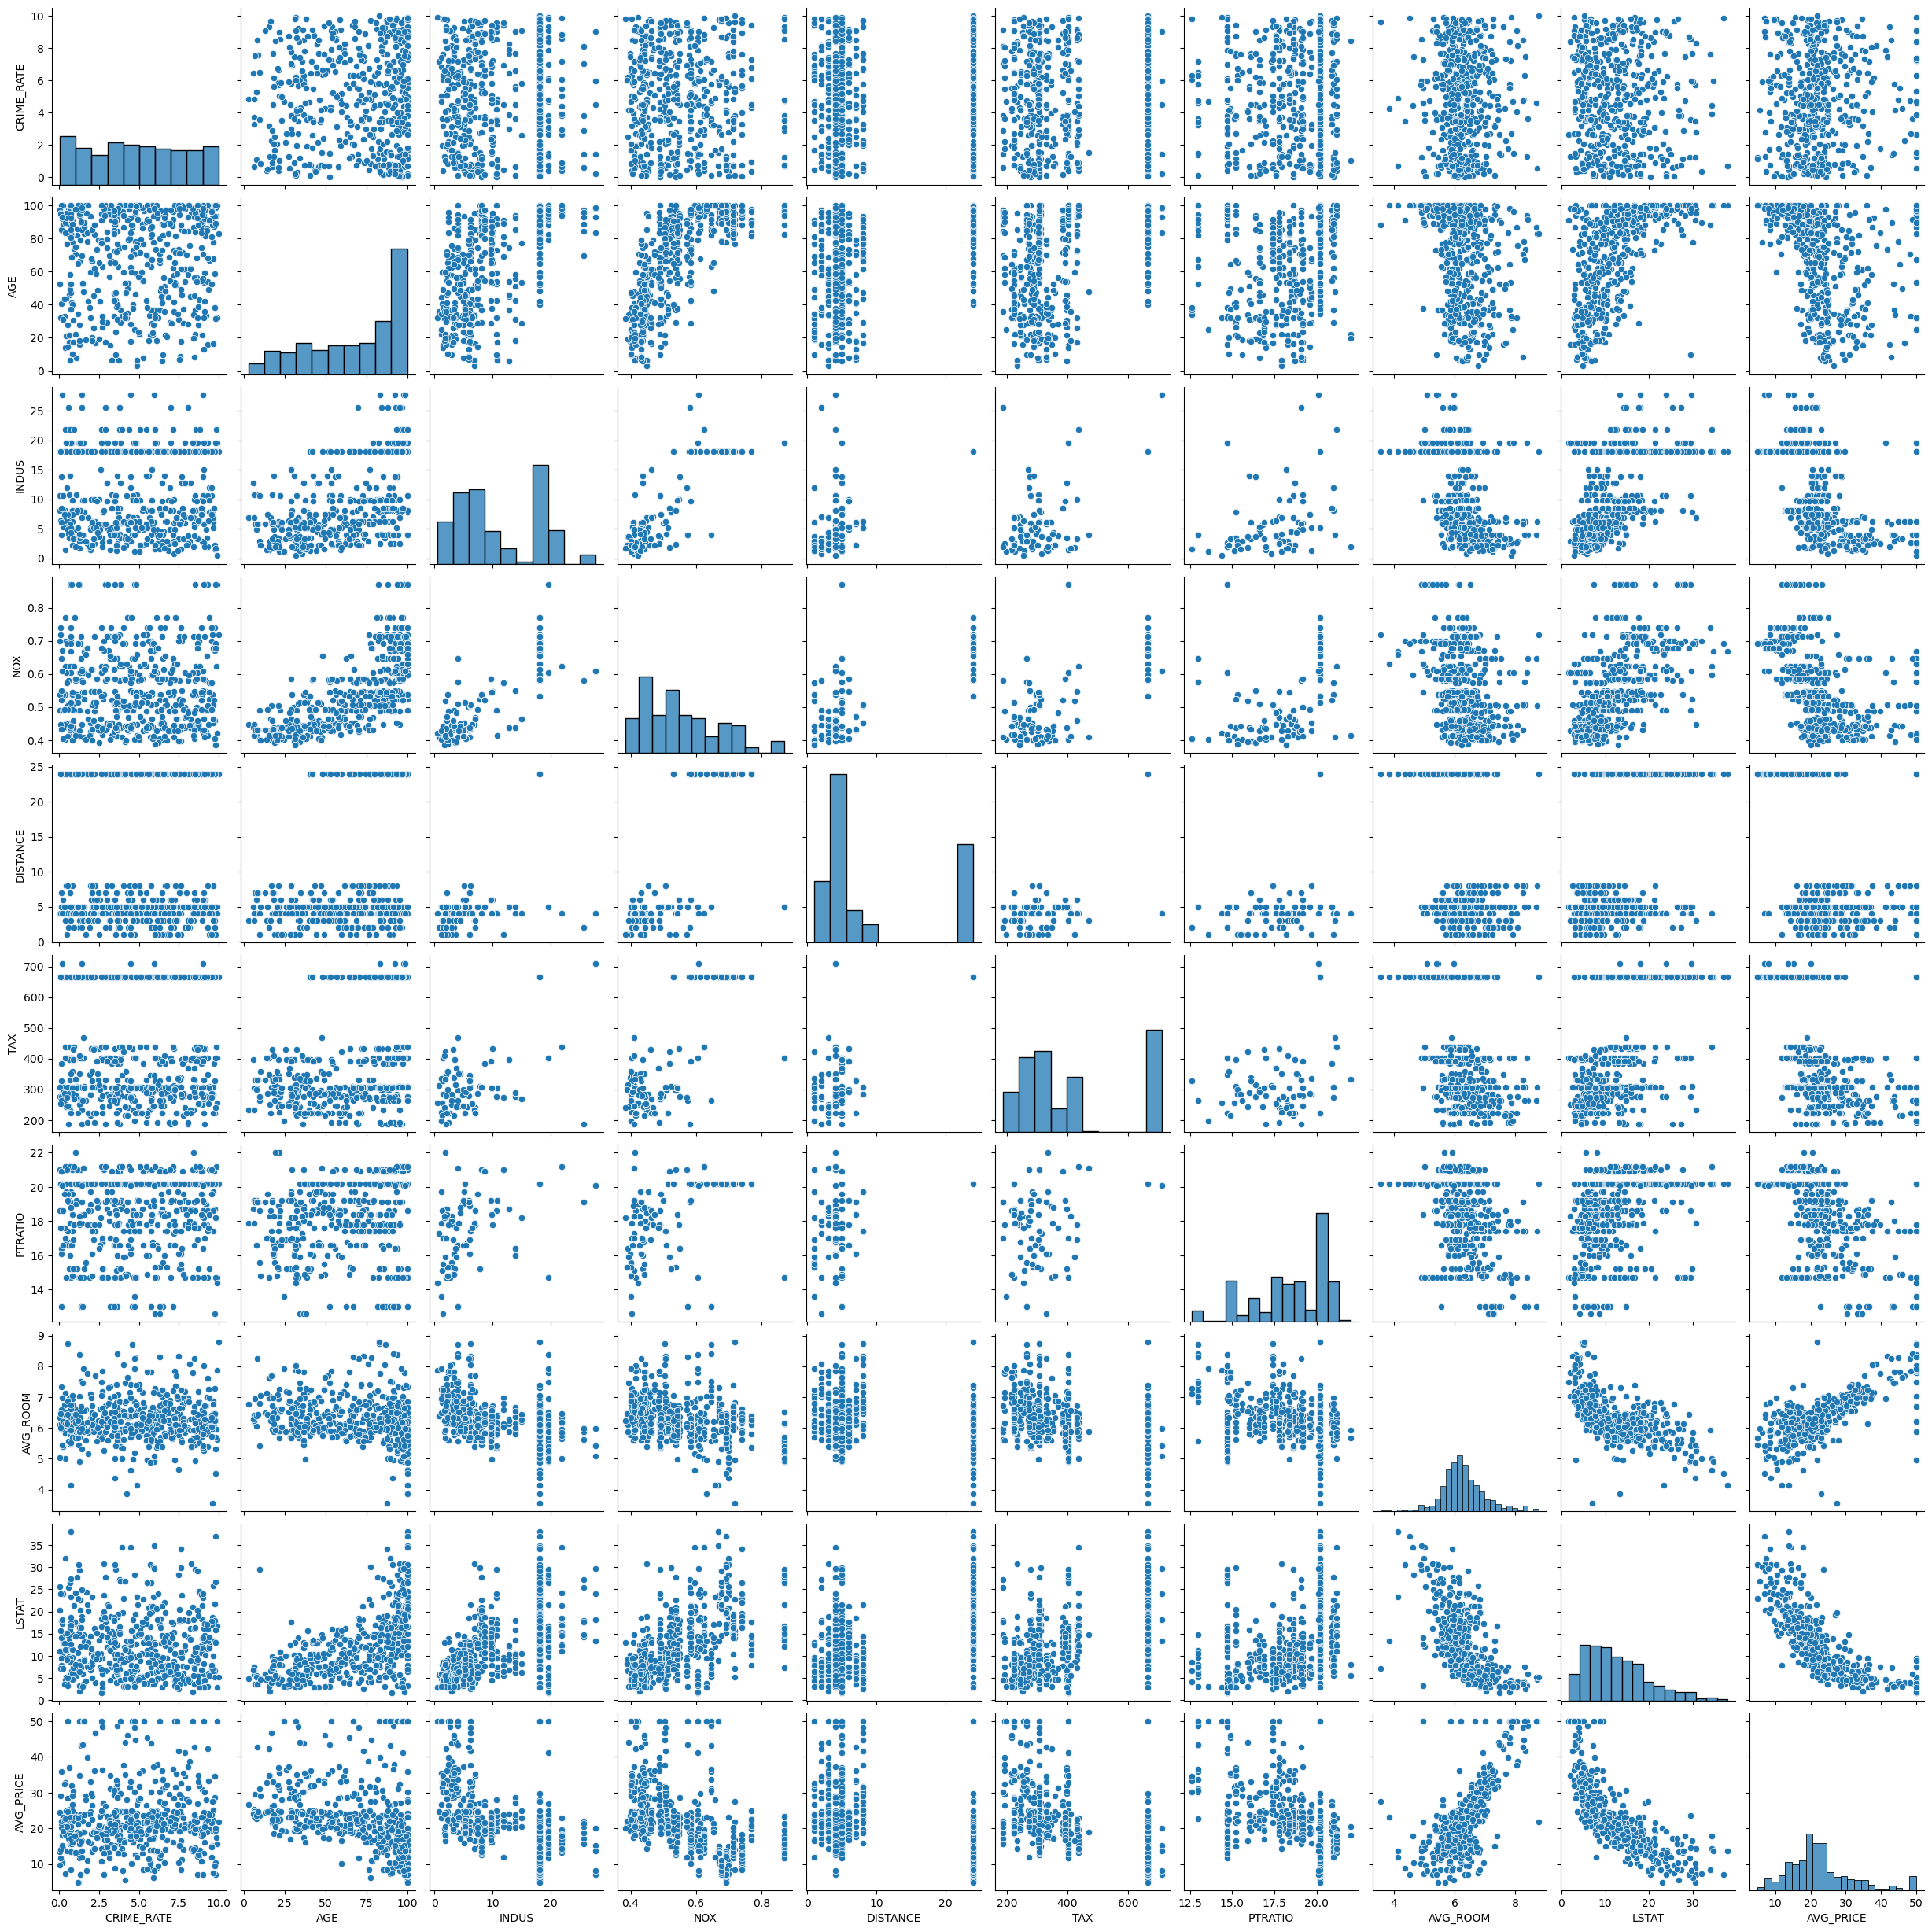

In [51]:
sns.pairplot(data)

In [52]:
# Getting the numerical data
X_num=data.drop('AVG_PRICE',axis=1)

In [53]:
# outlier handling:
Q1=X_num.quantile(0.25)
Q3=X_num.quantile(0.75)
IQR=Q3-Q1
lower_range=Q1-1.5*IQR
upper_range=Q3+1.5*IQR

In [54]:
upper_range

CRIME_RATE      14.69375
AGE            167.65000
INDUS           37.46500
NOX              0.88650
DISTANCE        54.00000
TAX           1246.50000
PTRATIO         24.40000
AVG_ROOM         7.73050
LSTAT           31.96250
dtype: float64

In [55]:
lower_range

CRIME_RATE     -4.95625
AGE           -28.55000
INDUS         -14.17500
NOX             0.18650
DISTANCE      -26.00000
TAX          -301.50000
PTRATIO        13.20000
AVG_ROOM        4.77850
LSTAT          -8.05750
dtype: float64

In [56]:
df=data[~((X_num<lower_range) | (X_num>upper_range)).any(axis=1)]

In [57]:
df.shape

(460, 10)

In [58]:
X_num=df.drop('AVG_PRICE',axis=1)

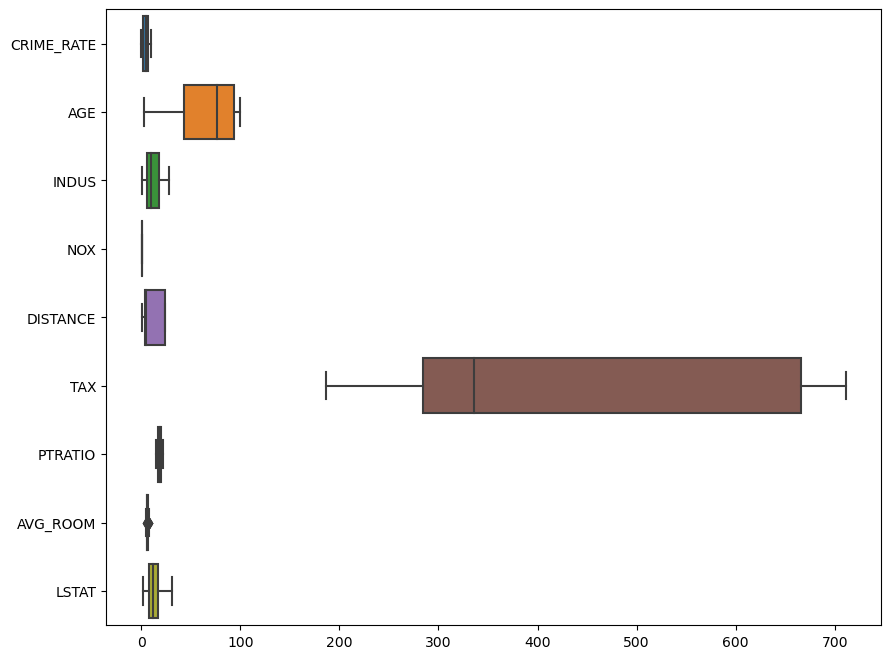

In [59]:
plt.figure(figsize=(10,8))
sns.boxplot(data=X_num,orient='h')
plt.show()

In [60]:
# Box plot after outlier handling ,we can see that there are no outliers

In [61]:
# One hot encoding

In [62]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [63]:
type(X_num_scaled)

numpy.ndarray

In [64]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [65]:
X_num_scaled.describe()

,CRIME_RATE,AGE,INDUS,NOX,DISTANCE,TAX,PTRATIO,AVG_ROOM,LSTAT
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,0.487263,0.669176,0.393467,0.345284,0.370888,0.426630,0.543478,0.476549,0.379008
std,0.297346,0.291557,0.251030,0.240022,0.378929,0.320151,0.264541,0.180706,0.224451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.228173,0.419413,0.181481,0.131687,0.130435,0.185115,0.369863,0.358058,0.198160
50%,0.485279,0.757981,0.339259,0.302469,0.173913,0.284351,0.602740,0.459979,0.348177
75%,0.736548,0.937436,0.642963,0.491770,1.000000,0.914122,0.753425,0.582800,0.528284
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
X=X_num_scaled

In [67]:
y=df[['AVG_PRICE']]

In [68]:
X.shape,y.shape

((460, 9), (460, 1))

In [69]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'dimension of X train data is:{X_train.shape}\
\ndimension of X test data is:{X_test.shape}\
\ndimension of Y train data is:{y_train.shape}\
\ndimension of Y test data is:{y_test.shape}')

dimension of X train data is:(368, 9)
dimension of X test data is:(92, 9)
dimension of Y train data is:(368, 1)
dimension of Y test data is:(92, 1)


### Linear Regression

In [70]:
lm = LinearRegression()
model1 = lm.fit(X_train,y_train)

In [71]:
model1.score(X_train,y_train)

0.6237615271959467

In [72]:
y_train_pred=model1.predict(X_train)
train_RMSE = np.sqrt(MSE(y_train, y_train_pred))
train_RMSE

4.608508877444109

In [73]:
# predict
y_test_pred = model1.predict(X_test)
y_test_pred
test_RMSE = np.sqrt(MSE(y_test, y_test_pred))
test_RMSE

4.054670688009451

In [74]:
model1.score(X_test,y_test)

0.7219282524481341

In [75]:
model1.intercept_, model1.coef_

(array([27.61546819]),
 array([[  0.44298672,   1.34617577,   3.10369205,  -4.02122303,
           3.97353832,  -4.96926543,  -5.1463572 ,   7.83069996,
         -19.52742612]]))

In [76]:
# predicted values
yhat_train = model1.predict(X_train)

In [77]:
# get R Square from the model
rsq=model1.score(X_train,y_train)
rsq

0.6237615271959467

In [78]:
# predict y_test using the model
yhat_test = model1.predict(X_test)

In [80]:
# compute MSE on train and test
model_MSE_train = np.mean((y_train - yhat_train)**2)
model_MSE_test = np.mean((y_test - yhat_test)**2)
model_MSE_train, model_MSE_test

(AVG_PRICE    21.238354
 dtype: float64,
 AVG_PRICE    16.440354
 dtype: float64)

In [81]:
# compute MAPE on train and test
model_MAPE_train = np.mean((abs(y_train - yhat_train)/y_train)*100)
model_MAPE_test = np.mean((abs(y_test - yhat_test)/y_test)*100)

In [82]:
model_performance = {'R Sq':rsq,'train_MSE':model_MSE_train,'test_MSE':model_MSE_test,'train_MAPE':model_MAPE_train,'test_MAPE':model_MAPE_test}

In [83]:
model_performance

{'R Sq': 0.6237615271959467,
 'train_MSE': AVG_PRICE    21.238354
 dtype: float64,
 'test_MSE': AVG_PRICE    16.440354
 dtype: float64,
 'train_MAPE': AVG_PRICE    16.31972
 dtype: float64,
 'test_MAPE': AVG_PRICE    15.129585
 dtype: float64}

In [84]:
Xrm_train = sm.add_constant(X_train)

In [85]:
Xrm_train.head()

,const,CRIME_RATE,AGE,INDUS,NOX,DISTANCE,TAX,PTRATIO,AVG_ROOM,LSTAT
501,1.0,0.450761,0.681771,0.414444,0.386831,0.000000,0.164122,0.863014,0.609392,0.273040
57,1.0,0.361421,0.387230,0.021481,0.053498,0.173913,0.131679,0.054795,0.688723,0.076341
158,1.0,0.472081,1.000000,0.697778,0.452675,0.173913,0.412214,0.000000,0.421914,0.161623
324,1.0,0.078173,0.383110,0.245926,0.222222,0.173913,0.190840,0.671233,0.546069,0.150963
24,1.0,0.126904,0.939238,0.274074,0.314815,0.130435,0.229008,0.863014,0.371398,0.501032


In [86]:
sm_model = sm.OLS(y_train,Xrm_train)
results = sm_model.fit()

In [87]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              AVG_PRICE   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     65.95
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           1.36e-70
Time:                        16:24:15   Log-Likelihood:                -1084.4
No. Observations:                 368   AIC:                             2189.
Df Residuals:                     358   BIC:                             2228.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.6155      1.383     19.970      0.000      24.896      30.335
CRIME_RATE     0.4430      0.826      0.536      0.592      -1.182       2.068
AGE            1.3462      1.369      0.983      0.326      -1.346       4.039
INDUS          3.1037      1.856      1.672      0.095      -0.546       6.754
NOX           -4.0212      2.017     -1.994      0.047      -7.987      -0.055
DISTANCE       3.9735      1.627      2.442      0.015       0.774       7.173
TAX           -4.9693      2.118     -2.346      0.020      -9.135      -0.804
PTRATIO       -5.1464      1.095     -4.701      0.000      -7.299      -2.993
AVG_ROOM       7.8307      1.701      4.603      0.000       4.485      11.176
LSTAT        -19.5274      1.756    -11.122      0.000     -22.980     -16.074
==============================================================================
Omnibus:                      202.110   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1706.227
Skew:                           2.177   Prob(JB):                         0.00
Kurtosis:                      12.608   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-- As the Durbin-Watson coefficient is really close to 2, there is no auto correlation between residuals.

-- Probability of F-statisic is almost zero,We can say that the null hypothesis can be rejected as there is atleast one independent variable that is significant in predicting label

-- Adjusted R2 is 0.614 which means that 61.4% variance is captured and explained by the model.

-- Probability of Jarques Bera statistic is 0.00 so we are rejecting null hypothesis and can assume that the residuals are not normally distributed.

-- As the condition number is below 100, we can say that there is low multicollinearity between features.

### KNN Regressor

In [94]:
# Train the model with different K values and calculate MAPE scores using CV
k_values = np.arange(1, 15, 2)
cv_mape_scores = []
train_mape_scores = []
test_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Calculating CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)
    
    # Training the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = MAPE(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculating test MAPE
    test_pred = knn.predict(X_test)
    test_mape = MAPE(y_test, test_pred)
    test_mape_scores.append(test_mape)

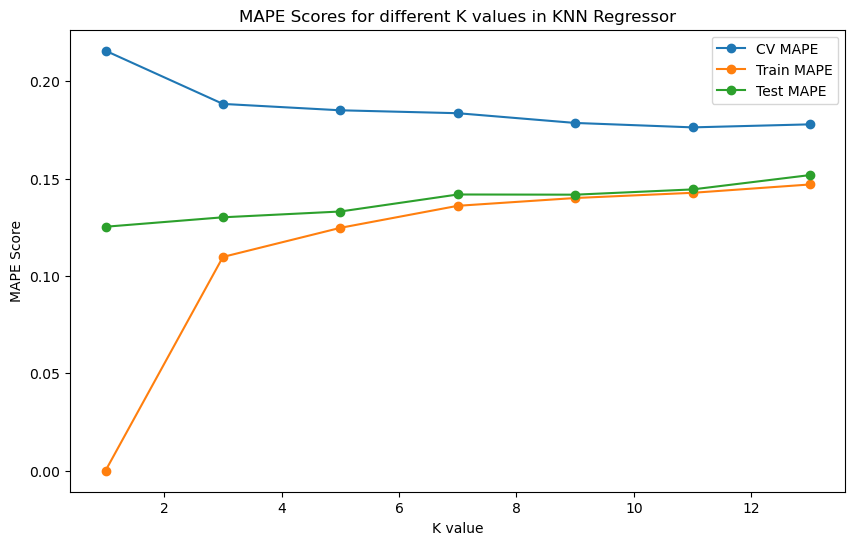

The best K value for CV is 11.


In [95]:
# Ploting CV MAPE, Train MAPE, and Test MAPE for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

# Comparing the best K value for CV
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")